# Assignment05

#### Nilakshi Pokharkar

# Implement MNIST class to predict the Handwritten digits

## We can directly run the MNIST_module05.py file in the terminal using following steps:


1. Save the MNIST_module05.py at any location.
2. Open the terminal and activate the environment where numpy, python modules are installed.
3. Execute the following command in the terminal:
    - ```python MNIST_module05.py 0_2.png 2```
    
**Note:** 
>**a. 0_2.png is the file name of the image.**

>**b. 2 is the label of the image (correct label).**

>**c. Save the image in the /TestImages of the current location where MNIST_module05.py is saved.**



Go through the MNIST_module05.py script to understand how the MNIST class is defined is implemented.

## To use the MNIST_module05.py script from another script module05.py

- module04.py contains the code that provides the inputs and prints the results of the multilayer perceptron.
- Open the terminal and activate the environment where numpy, python modules are installed.
- Execute the following command in the terminal:
    - ```python module05.py 0_2.png 2```

**Note:** 
>**a. 0_2.png is the file name of the image.**

>**b. 2 is the label of the image (correct label).**

>**c. Save the image in the /TestImages of the current location where MNIST_module05.py is saved.**    
    
    

Go through the module05.py script to understand how MNIST class is imported and it’s functions are used to determine the value of handwritten digits

## To import the class Mnist in the jupyter notebook and use it

import the class Mnist from the MNIST_module05 using the followig command:
>```from MNIST_module05 import Mnist```

In [1]:
from MNIST_module05 import Mnist

### Import Other dependency Packages

In [2]:
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
import glob
from IPython.display import Image, display

### Fetch Images from the ```/TestImages``` folder and run the prediction function

All the images are stored under ```/TestImages``` folder.

Foe example: ```file_names = ['TestImages/0_2.png', 'TestImages/2_3.png', 'TestImages/3_1.png', 'TestImages/3_4.png','TestImages/7_4.png', 'TestImages/8_2.png', 'TestImages/8_4.png', 'TestImages/9_6.png', 'TestImages/2_6.png', 'TestImages/9_2.png', 'TestImages/5_2.png']```

/home/nilakshi/Documents/NBP/Fall2022/ECE_5831/Module05/MNIST_module05.py:58: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


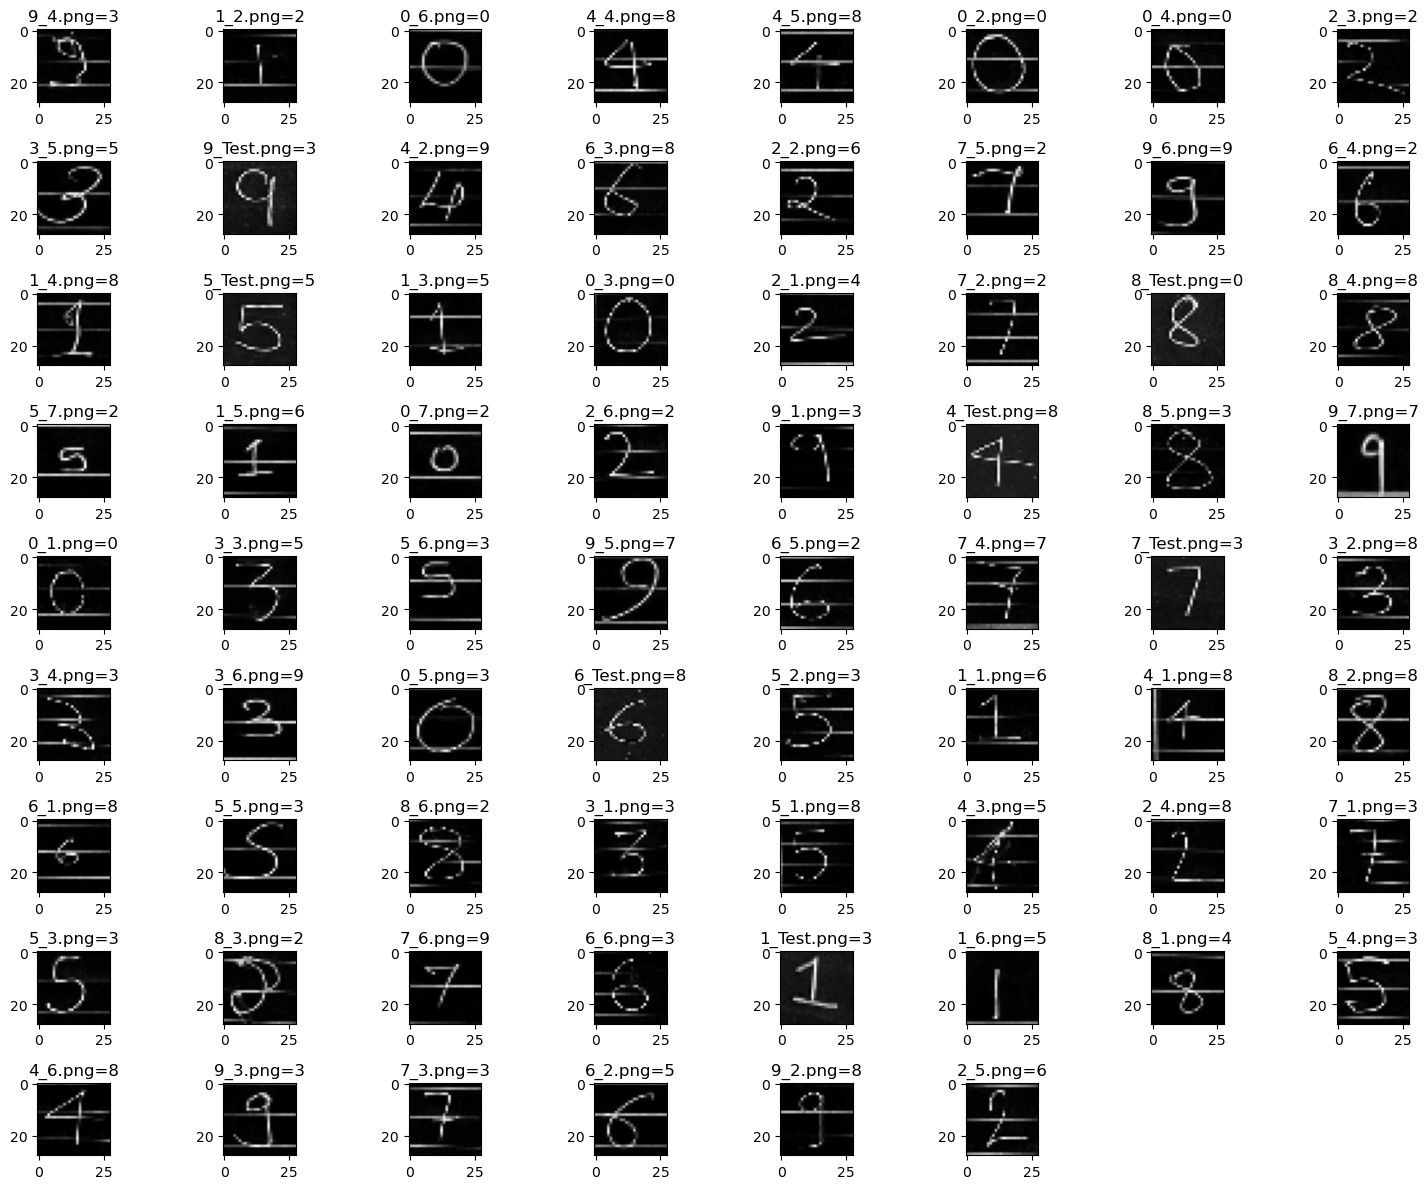

In [3]:
mnist = Mnist()
network = mnist.init_network()
rows = 9
columns = 8
i = 1
fig = plt.figure(figsize=(15,12))
file_names = []
for imageName in glob.glob('TestImages/*.png'): 
    file_names.append(imageName)

for name in file_names:
    #print(name)
#     img2show = Image.open(name).convert('RGB')
#     img2show = ImageOps.fit(img2show, (28,28), Image.ANTIALIAS)
    
    image = cv2.imread(name)
    # Adds a subplot at the 1st position
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(image) #Invert the colors
    image = cv2.resize(image,(28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(image, cmap='gray')
    i += 1
    image = image.reshape(784,) #Reshaped the img in the 784 size vector!!

    y = mnist.predict(network, image)
    predicted_num = np.argmax(y)
    
    #print('The predicted value is {}'.format(predicted_num))
        
#     fig.add_subplot(rows, columns, i)
#     i += 1
#     plt.imshow(img2show)
    #To increase the spacing betwen the plots
    # ref: https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots
    fig.tight_layout() 
    #plt.axis('off')
    plt.title('{}={}'.format(name.split("/")[1],predicted_num))
    
#     if(predicted_num == digit_Value):
#         print('Image {} is for digit {} is recognized as {}'.format(file_name, digit_Value, predicted_num))
#     else:
#         print('Image {}  is for digit {} but the inference result is {}'.format(file_name, digit_Value, predicted_num))